In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math
from matplotlib.ticker import ScalarFormatter
from pylab import figure

List of plots:

Histograms:
1. Number of tracks per event
2. Number of space points per track
3. p0 distribution
4. p1 distribution
5. p2 distribution
6. p3 distribution
7. chi2 distribution

2D scatter plots:
8. sp_track_x vs sp_track_y (all layers and first layer)
9. p0 vs p2
10. p1 vs p3

In [2]:
data = uproot.open("trackerspfit.root")
#data10= uproot.open("FASERnu1_1-10_muminus.root")

In [3]:
data.keys()
#print(data10.keys())

['sp;1',
 'sp/YvsX_s1l1m0;1',
 'sp/XvsX_s1l1m0;1',
 'sp/XvsY_s1l1m0;1',
 'sp/YvsY_s1l1m0;1',
 'sp/YvsX_s1l1m1;1',
 'sp/XvsX_s1l1m1;1',
 'sp/XvsY_s1l1m1;1',
 'sp/YvsY_s1l1m1;1',
 'sp/YvsX_s1l1m2;1',
 'sp/XvsX_s1l1m2;1',
 'sp/XvsY_s1l1m2;1',
 'sp/YvsY_s1l1m2;1',
 'sp/YvsX_s1l1m3;1',
 'sp/XvsX_s1l1m3;1',
 'sp/XvsY_s1l1m3;1',
 'sp/YvsY_s1l1m3;1',
 'sp/YvsX_s1l1m4;1',
 'sp/XvsX_s1l1m4;1',
 'sp/XvsY_s1l1m4;1',
 'sp/YvsY_s1l1m4;1',
 'sp/YvsX_s1l1m5;1',
 'sp/XvsX_s1l1m5;1',
 'sp/XvsY_s1l1m5;1',
 'sp/YvsY_s1l1m5;1',
 'sp/YvsX_s1l1m6;1',
 'sp/XvsX_s1l1m6;1',
 'sp/XvsY_s1l1m6;1',
 'sp/YvsY_s1l1m6;1',
 'sp/YvsX_s1l1m7;1',
 'sp/XvsX_s1l1m7;1',
 'sp/XvsY_s1l1m7;1',
 'sp/YvsY_s1l1m7;1',
 'sp/sp_x;1',
 'sp/sp_y;1',
 'sp/sp_z;1',
 'sp/sp_r;1',
 'sp/sp_eta;1',
 'sp/sp_phi;1',
 'sp/sp_strip;1',
 'sp/sp_layer;1',
 'sp/sp_station;1',
 'sp/sp_x_y_plane0;1',
 'sp/sp_x_y_plane1;1',
 'sp/sp_x_y_plane2;1',
 'sp/sp_x_y_plane3;1',
 'sp/sp_x_y_plane4;1',
 'sp/sp_x_y_plane5;1',
 'sp/sp_x_y_plane6;1',
 'sp/sp_x_y_pl

In [4]:
data["spfit;1"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
evtId                | int32_t                  | AsDtype('>i4')
sp_track_x           | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_y           | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_z           | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_x_err       | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_y_err       | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_z_err       | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_x_predicted | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_y_predicted | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_z_predicted | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
sp_track_x_residual  | std::vector<double>  

In [5]:
sp_track_x_predicted=data["spfit;1"]["sp_track_x_predicted"].array()
sp_track_y_predicted=data["spfit;1"]["sp_track_y_predicted"].array()
sp_track_z_predicted=data["spfit;1"]["sp_track_z_predicted"].array()
predicted=np.array((sp_track_x_predicted,sp_track_y_predicted,sp_track_z_predicted)).T

In [ ]:
fig=plt.figure()
plt.hist(data["sp/sp_residual_y_plane0;1"],bins=100)


In [6]:
flat_predicted=np.array((np.hstack(predicted[:,0]),np.hstack(predicted[:,1]),np.hstack(predicted[:,2]))).T

In [7]:
sp_track_x_err=data["spfit;1"]["sp_track_x_err"].array()
sp_track_y_err=data["spfit;1"]["sp_track_y_err"].array()
sp_track_z_err=data["spfit;1"]["sp_track_z_err"].array()
errors=np.array((sp_track_x_err,sp_track_y_err,sp_track_z_err)).T

In [8]:
flat_errors=np.array((np.hstack(errors[:,0]),np.hstack(errors[:,1]),np.hstack(errors[:,2]))).T

In [9]:
sp_track_x=data["spfit;1"]["sp_track_x"].array()
sp_track_y=data["spfit;1"]["sp_track_y"].array()
sp_track_z=data["spfit;1"]["sp_track_z"].array()
track_p0=data["spfit;1"]["track_p0"].array()
track_p1=data["spfit;1"]["track_p1"].array()
track_p2=data["spfit;1"]["track_p2"].array()
track_p3=data["spfit;1"]["track_p3"].array()
evtId=data["spfit;1"]["evtId"].array()
trackId=data["spfit;1"]["trackId"].array()
chi2=data["spfit;1"]["track_chi2"].array()

In [64]:
trackId

<Array [[], [], [], ... [74868, 74868, 74869]] type='223212 * var * int32'>

In [63]:
sp_track_x

<Array [[], [], [], ... [-75, -75, -76]] type='223212 * var * float64'>

In [13]:
dataarr=np.array((evtId,trackId,sp_track_x,sp_track_y,sp_track_z,track_p0,track_p1,track_p2,track_p3,chi2)).T

In [14]:
def dataarr_has_num_of_tracks(num,dataarray):
    numarray=[]
    for i in range(len(dataarray[:,1])): # Check number of non-empty entries in trackId
        if len(dataarray[i,1][~np.isnan(dataarray[i,1])])==num:
            numarray.append(dataarray[i])
    return np.array(numarray).T

In [16]:
zerotracks=dataarr_has_num_of_tracks(0,dataarr)
#onetracks=dataarr_has_num_of_tracks(1,dataarr)
#twotracks=dataarr_has_num_of_tracks(2,dataarr)
#threetracks=dataarr_has_num_of_tracks(3,dataarr)

In [17]:
print(len(zerotracks[1]))
#print(len(onetracks))
#print(len(twotracks))
#print(len(threetracks[1]))

154194


In [18]:
nozeros=dataarr[np.in1d(dataarr[:,0],zerotracks[0],invert=True)]

In [19]:
#nothrees=nozeros[np.in1d(nozeros[:,0],threetracks[0],invert=True)]
#print(len(nothrees[:,0]))

In [20]:
# Calculate number of tracks in each event:
numtracks=[]
for i in nozeros:
    numtracks.append([i[0],np.unique(i[1]),len(np.unique(i[1]))])
numtracks=np.array(numtracks)

In [21]:
print('number of fitted tracks',numtracks)

number of fitted tracks [[10 array([0, 1]) 2]
 [12 array([1, 2]) 2]
 [15 array([2, 3]) 2]
 ...
 [223210 array([74866, 74867]) 2]
 [223211 array([74867, 74868]) 2]
 [223212 array([74868, 74869]) 2]]


In [ ]:
# Find max number of tracks in a single event
maxlen=0
evtid=0
for i in numtracks:
    if i[2]>maxlen:
        maxlen=i[2]
        evtid=i[0]
print(maxlen)
print(evtid)

In [ ]:
# Find number of eventswith number of tracks >= 2
length=4
total=0
for i in numtracks:
    if i[2]>=length:
        total+=1
print(total)

In [ ]:
# Calculate number of spacepoints in each event:
numsp_evt=[]
for i in nozeros:
    numsp_evt.append( [i[0],len(i[1])] )
numsp_evt=np.array(numsp_evt)
#Find max number of spacepoints in a single event:
maxlen=0
evtid=0
for i in numsp_evt:
    if i[1]>maxlen:
        maxlen=i[1]
        evtid=i[0]
print(maxlen)
print(evtid)

In [ ]:
# Make a histogram of number of tracks in each event:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.hist(numtracks[:,2],bins=50)
ax.set_title('Number of tracks per event (excluding 0 track events)')
ax.set_xlabel('Number of tracks')
ax.set_ylabel('Total')

plt.savefig('Number of tracks per event')
plt.show()

In [22]:
# Flatten data:
flat_trackId=np.hstack(nozeros[:,1])
flat_sp_track_x=np.hstack(nozeros[:,2])
flat_sp_track_y=np.hstack(nozeros[:,3])
flat_sp_track_z=np.hstack(nozeros[:,4])
flat_track_p0=np.hstack(nozeros[:,5])
flat_track_p1=np.hstack(nozeros[:,6])
flat_track_p2=np.hstack(nozeros[:,7])
flat_track_p3=np.hstack(nozeros[:,8])
flat_chi2=np.hstack(nozeros[:,9])

In [23]:
# make evtId the same length as other labels and flatten data:
evtIdarr=[]
for i in nozeros:
    temparr=[]
    for j in i[1]:
        temparr.append(i[0])
    temparr=np.array(temparr).T
    evtIdarr.append(temparr)
evtIdarr=np.array(evtIdarr).T
flat_evtId=np.hstack(evtIdarr)

In [27]:
flat_dataarr=np.array((flat_evtId,flat_trackId,flat_sp_track_x,flat_sp_track_y,flat_sp_track_z,flat_track_p0,flat_track_p1,flat_track_p2,flat_track_p3,flat_chi2)).T

In [28]:
# Caclulate number of sp per track:
trkid_counter=0
uniquetrkid=np.unique(flat_dataarr[:,1])
numsp=np.zeros(len(uniquetrkid))
numsp=np.column_stack((uniquetrkid,numsp))
for i in flat_dataarr:  
        if i[1]==numsp[trkid_counter][0]:
            numsp[trkid_counter][1]+=1
        else :
            trkid_counter+=1
            numsp[trkid_counter][1]+=1

In [29]:
print('total number of unique track id =',len(numsp))

total number of unique track id = 74870


In [36]:
max(flat_dataarr[:,1])

74869.0

In [ ]:
# Histogram of number of spacepoints per track:

fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.hist(numsp[:,1],bins=10)
ax.set_title('Number of spacepoints per track')
ax.set_xlabel('Number of spacepoints')
ax.set_ylabel('Total')

plt.savefig('Number of spacepoints per track')
plt.show()

In [41]:
# Calculate how many tracks there are with one sp, two sp ,three sp
ones=0
twos=0
threes=0
more=0
for i in numsp:
    if i[1]==1:
        ones+=1
        print('evtId = ',i[0],'number of tracks = 1')
    elif i[1]==2:
        twos+=1
        print('evtId = ',i[0],'number of tracks = 2')
    elif i[1]==3:
        threes+=1
    elif i[1]>=3:
        more+=1
        print('evtId = ',i[0],'number of tracks =',i[1])
        
print('ones =',ones,', twos = ',twos,', threes =',threes,'. More than 3 =',more)

evtId =  0.0 number of tracks = 2
evtId =  74869.0 number of tracks = 1
ones = 1 , twos =  1 , threes = 74868 . More than 3 = 0


In [37]:
print('total number of spacepoints =',len(flat_dataarr[:,0]))

total number of spacepoints 224607


In [ ]:
# p0 distribution :flat_dataarr[5]

fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.hist(flat_dataarr[:,5],bins=100)
ax.set_title('p0 distribution')
ax.set_xlabel('p0 unit: mm')
ax.set_ylabel('Total')
plt.savefig('p0 distribution')
plt.show()

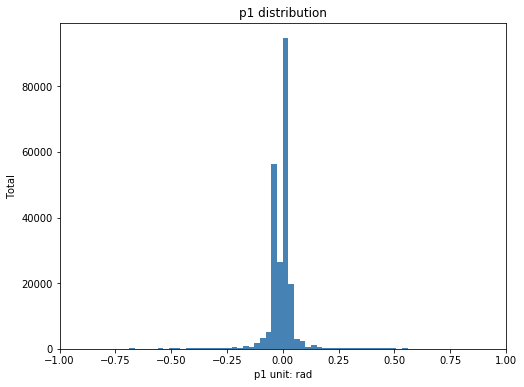

In [342]:
# p1 distribution :flat_dataarr[6]

fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.hist(flat_dataarr[:,6],bins=200,color='steelblue')
ax.set_title('p1 distribution')
ax.set_xlabel('p1 unit: rad')
ax.set_ylabel('Total')
plt.xlim(-1,1)
plt.savefig('p1 distribution')
plt.show()

In [ ]:
print(np.mean(flat_dataarr[:,6]))

In [ ]:
# p2 distribution :flat_dataarr[7]

fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.hist(flat_dataarr[:,7],bins=100)
ax.set_title('p2 distribution')
ax.set_xlabel('p2 unit: mm')
ax.set_ylabel('Total')
plt.savefig('p2 distribution')
plt.show()

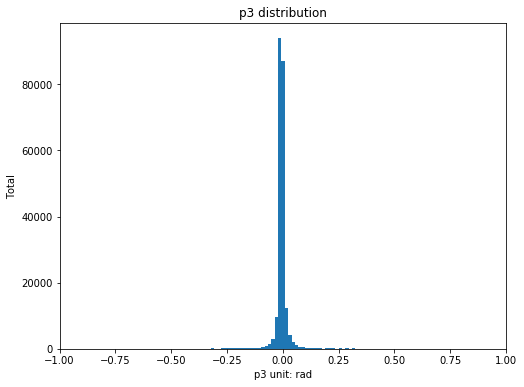

In [343]:
# p3 distribution :flat_dataarr[8]

fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.hist(flat_dataarr[:,8],bins=200)
ax.set_title('p3 distribution')
ax.set_xlabel('p3 unit: rad')
ax.set_ylabel('Total')
plt.xlim(-1,1)
plt.savefig('p3 distribution')
plt.show()

In [ ]:
print(np.mean(flat_dataarr[:,8]))

In [ ]:
# chi2 histogram
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.hist(flat_dataarr[:,9],bins=100)
ax.set_title('chi2 distribution')
ax.set_xlabel('chi2')
ax.set_ylabel('Total')
plt.savefig('chi2 distribution')
plt.show()

In [ ]:
# error x,y,z histogram
fig,ax=plt.subplots(3,1,figsize=(8,6))
ax[0].hist(flat_errors[:,0],color='steelblue',label='x error')
ax[1].hist(flat_errors[:,1],alpha=0.7,color='orange',label='y error')
ax[2].hist(flat_errors[:,2],alpha=0.3,color='lime',label='z error')
ax[0].set_title('track_x,y,z error distribution')
ax[2].set_xlabel('error')
ax[0].set_ylabel('Total')
ax[1].set_ylabel('Total')
ax[2].set_ylabel('Total')
#plt.xlim()
plt.savefig('track_xyz error distribution')
plt.show()

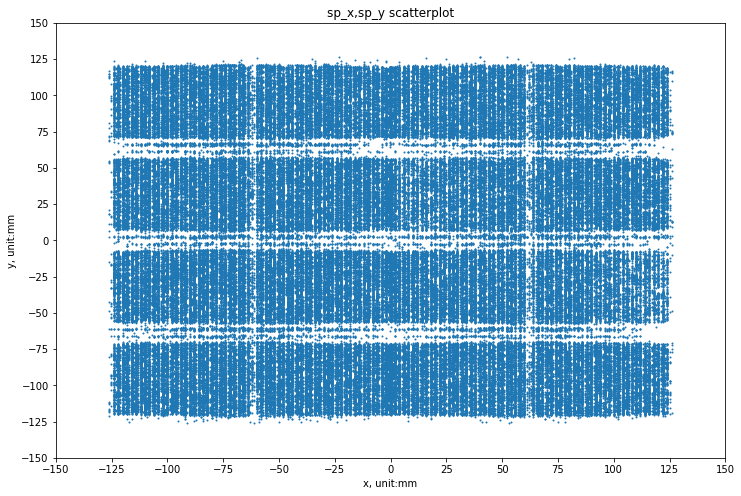

In [47]:
# Scatterplot of x,y:

fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(flat_dataarr[:,2],flat_dataarr[:,3],s=1)
ax.set_title('sp_x,sp_y scatterplot')
ax.set_xlabel('x, unit:mm')
ax.set_ylabel('y, unit:mm')

# Get current xtick locations and append personal ticks to this array
x_ticks = np.append(ax.get_xticks(), [-125,-75,-25,25,75,125])
# Set xtick locations to the values of the array `x_ticks`
ax.set_xticks(x_ticks)

# Same for y
y_ticks = np.append(ax.get_yticks(), [-125,-75,-25,25,75,125])
# Set xtick locations to the values of the array `x_ticks`
ax.set_yticks(y_ticks)

plt.savefig('Scatterplot of x and y')
plt.show()

In [ ]:
# Scatterplot of x,y superimposed by predicted x,y:

fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(flat_dataarr[:,2],flat_dataarr[:,3],s=0.5,color='steelblue',label='sp_track')
ax.scatter(flat_predicted[:,0],flat_predicted[:,1],s=0.5,alpha=0.3,color='orange',label='sp_track_predicted')
ax.set_title('sp_x,sp_y vs predicted sp_x,y')
ax.set_xlabel('x, unit:mm')
ax.set_ylabel('y, unit:mm')
plt.legend(loc='upper right')
plt.savefig('Scatterplot of x y vs predicted x y')
plt.show()

In [ ]:
# Scatterplot of x,y superimposed by predicted x,y:

fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(flat_dataarr[0:20,2],flat_dataarr[0:20,3],s=3,color='steelblue',label='sp_track')
ax.scatter(predicted[0:20,0],predicted[0:20,1],s=3,alpha=0.4,color='red',label='sp_track_predicted')
ax.set_title('sp_x,sp_y vs predicted sp_x,y')
ax.set_xlabel('x, unit:mm')
ax.set_ylabel('y, unit:mm')
plt.legend(loc='upper right')
plt.savefig('Scatterplot of x y vs predicted x y sp0-20')
plt.show()

In [ ]:
# Scatterplot of p0,p2:

fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(flat_dataarr[:,5],flat_dataarr[:,7],s=1)
ax.set_title('p0 vs p2 scatterplot')
ax.set_xlabel('p0, unit:mm')
ax.set_ylabel('p2, unit:mm')

plt.savefig('Scatterplot of p0 vs p2')
plt.show()

In [ ]:
# Scatterplot of p1,p3:
# tx= tan(thetax) , no unit

fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(flat_dataarr[:,6],flat_dataarr[:,8],s=1)
ax.set_title('tx (p1) vs ty (p3) scatterplot')
ax.set_xlabel('tx (p1)')
ax.set_ylabel('ty (p3)')


x_ticks = np.append(ax.get_xticks(), [-2.5,-1.5,-0.5,0.5,1.5,2.5])
ax.set_xticks(x_ticks)

#y_ticks = np.append(ax.get_yticks(),[-1.25,-0.75,-0.25,0.25,0.75,1.25,1.75])
#ax.set_yticks(y_ticks)

plt.savefig('Scatterplot of p1 vs p3')
plt.show()

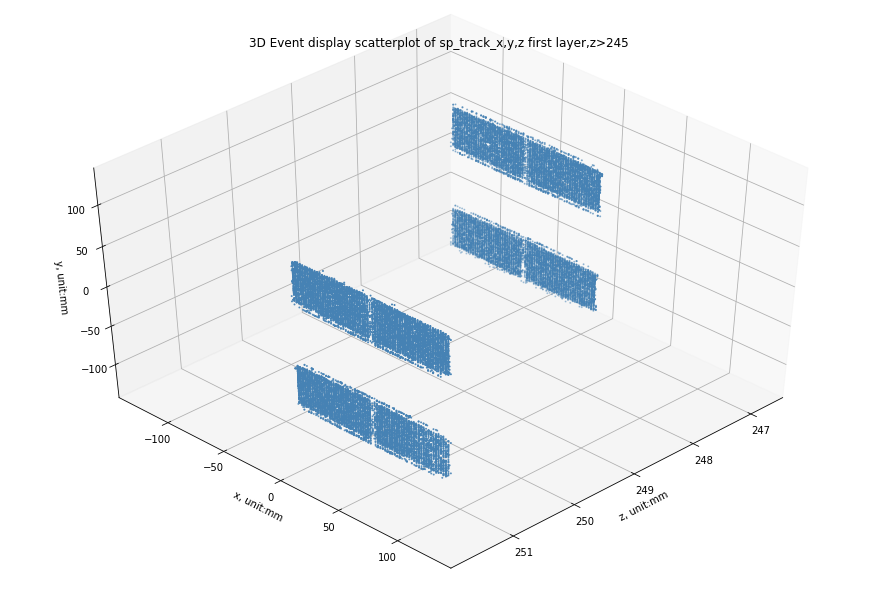

In [306]:
# 3D Event display scatterplot of x,y,z:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
#x, y, z = flat_dataarr[:,2],flat_dataarr[:,3],flat_dataarr[:,4]
newtrack_sp1=track_sp1[track_sp1[:,2]>=245]
x, y, z =newtrack_sp1[:,0],newtrack_sp1[:,1],newtrack_sp1[:,2]
x, y, z =newtrack_sp1[:,0],newtrack_sp1[:,1],newtrack_sp1[:,2]
ax.scatter(z,x,y,s=1,color='steelblue')
ax.set_xlabel('z, unit:mm')
ax.set_ylabel('x, unit:mm')
ax.set_zlabel('y, unit:mm')
ax.view_init(elev=45,azim=45)
#ax.axes.set_xlim3d(247,252)
plt.title('3D Event display scatterplot of sp_track_x,y,z first layer,z>245')
#plt.savefig('3D Event display scatterplot of x y z',bbox_inches='tight')
plt.show()

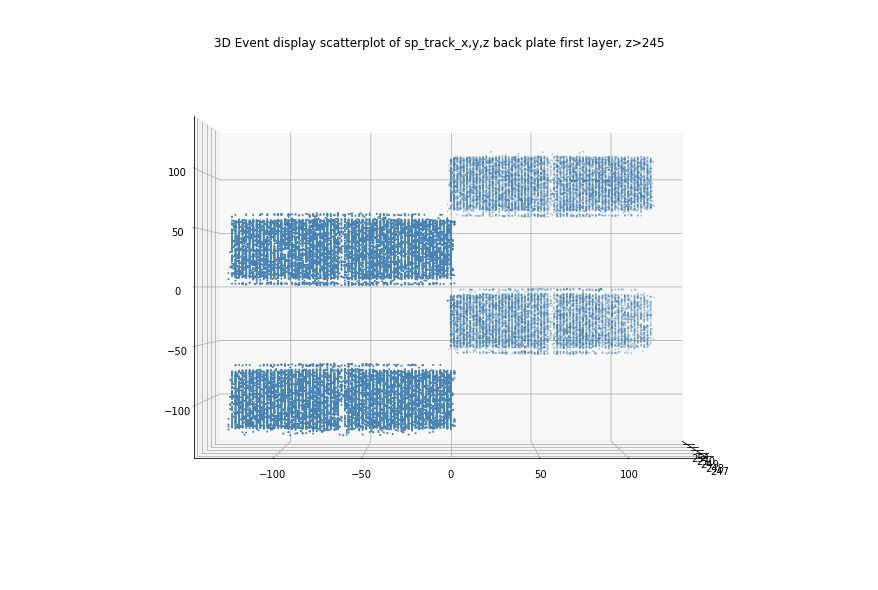

In [340]:
# 3D Event display scatterplot of x,y,z:
fig = plt.figure(figsize=(12,8))
#ax = Axes3D(fig)
#x, y, z = flat_dataarr[:,2],flat_dataarr[:,3],flat_dataarr[:,4]
newtrack_sp1=track_sp1[track_sp1[:,2]>=245]
x, y, z =newtrack_sp1[:,0],newtrack_sp1[:,1],newtrack_sp1[:,2]
ax.scatter(z,x,y,s=1,color='steelblue')
#ax.set_xlabel('z, unit:mm')
#ax.set_ylabel('x, unit:mm')
#ax.set_zlabel('y, unit:mm')
ax.view_init(elev=0,azim=0)
ax.invert_xaxis()
#ylim = ax.get_ylim()
#ax.set_yticks( ax.get_yticks() )
#ax.set_ylim(ylim[::-1])
#ax.axes.set_xlim3d(247,252)
plt.title('3D Event display scatterplot of sp_track_x,y,z back plate first layer, z>245')
plt.savefig('3D Event display scatterplot of x y z back plate first layer',bbox_inches='tight')
plt.show()

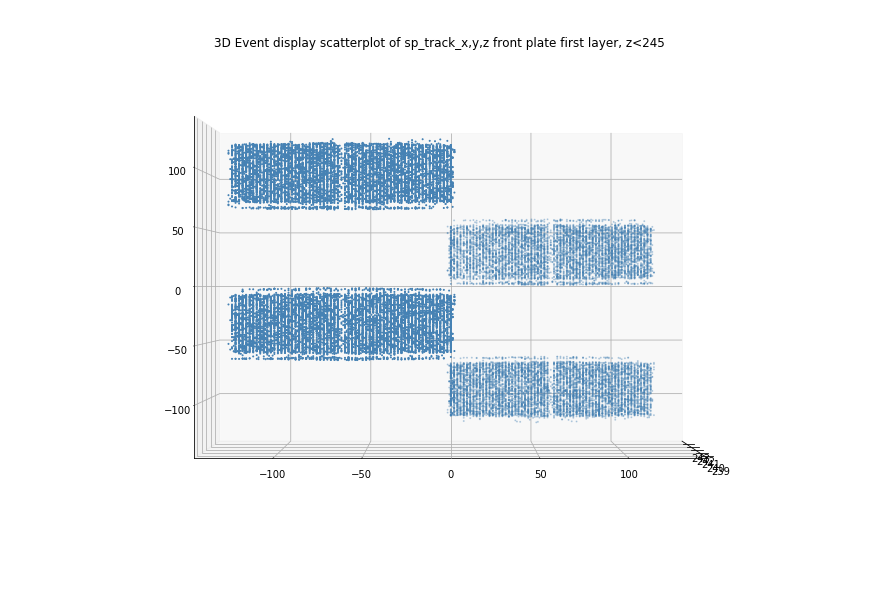

In [341]:
# 3D Event display scatterplot of x,y,z:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
#x, y, z = flat_dataarr[:,2],flat_dataarr[:,3],flat_dataarr[:,4]
newtrack_sp1=track_sp1[track_sp1[:,2]<245]
x, y, z =newtrack_sp1[:,0],newtrack_sp1[:,1],newtrack_sp1[:,2]
ax.scatter(z,x,y,s=1,color='steelblue')
#ax.set_xlabel('z, unit:mm')
#ax.set_ylabel('x, unit:mm')
#ax.set_zlabel('y, unit:mm')
ax.view_init(elev=0,azim=0)
ax.invert_xaxis()
#ylim = ax.get_ylim()
#ax.set_yticks( ax.get_yticks() )
#ax.set_ylim(ylim[::-1])
#ax.axes.set_xlim3d(247,252)
plt.title('3D Event display scatterplot of sp_track_x,y,z front plate first layer, z<245')
plt.savefig('3D Event display scatterplot of x y z, front plate first layer',bbox_inches='tight')
plt.show()

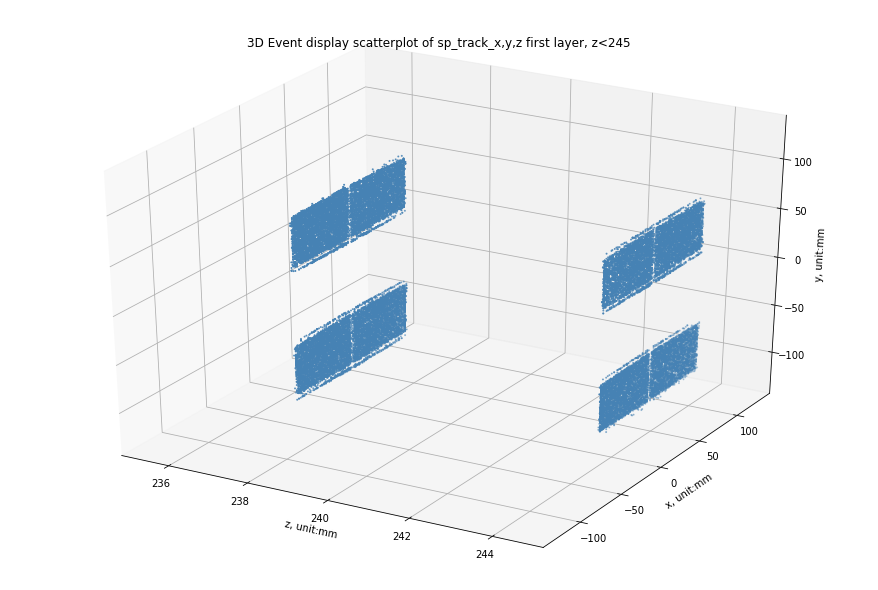

In [327]:
# 3D Event display scatterplot of x,y,z:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
#x, y, z = flat_dataarr[:,2],flat_dataarr[:,3],flat_dataarr[:,4]
newtrack_sp1=track_sp1[track_sp1[:,2]<245]
x, y, z =newtrack_sp1[:,0],newtrack_sp1[:,1],newtrack_sp1[:,2]
ax.scatter(z,x,y,s=1,color='steelblue')
ax.set_xlabel('z, unit:mm')
ax.set_ylabel('x, unit:mm')
ax.set_zlabel('y, unit:mm')
ax.invert_xaxis()
ax.invert_yaxis()
ax.axes.set_xlim3d(235,245)
#ax.view_init(elev=20,azim=0)
plt.title('3D Event display scatterplot of sp_track_x,y,z first layer, z<245')
#plt.savefig('3D Event display scatterplot of x y z',bbox_inches='tight')
plt.show()

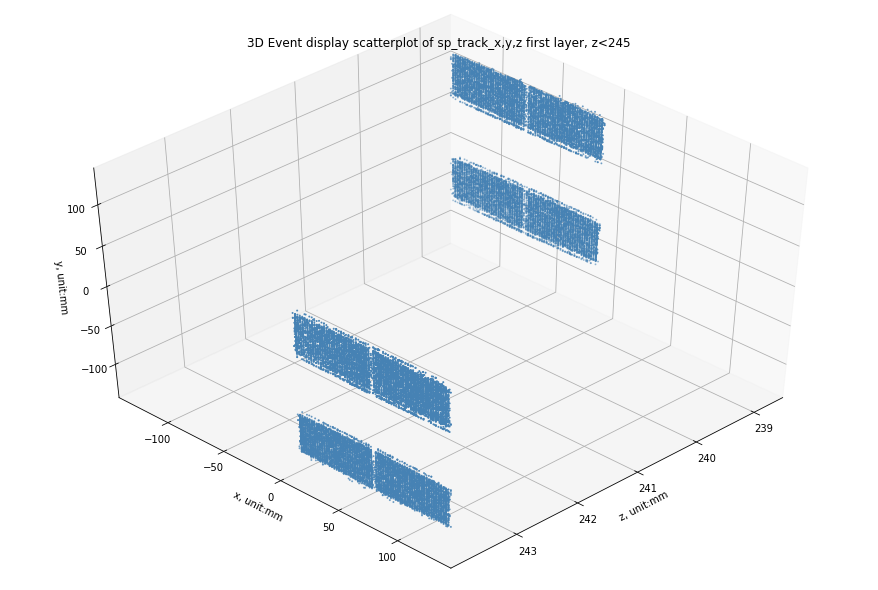

In [304]:
# 3D Event display scatterplot of x,y,z:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
#x, y, z = flat_dataarr[:,2],flat_dataarr[:,3],flat_dataarr[:,4]
newtrack_sp1=track_sp1[track_sp1[:,2]<245]
x, y, z =newtrack_sp1[:,0],newtrack_sp1[:,1],newtrack_sp1[:,2]
ax.scatter(z,x,y,s=1,color='steelblue')
ax.set_xlabel('z, unit:mm')
ax.set_ylabel('x, unit:mm')
ax.set_zlabel('y, unit:mm')
ax.view_init(elev=45,azim=45)
#ax.axes.set_xlim3d(247,252)
plt.title('3D Event display scatterplot of sp_track_x,y,z first layer, z<245')
#plt.savefig('3D Event display scatterplot of x y z',bbox_inches='tight')
plt.show()

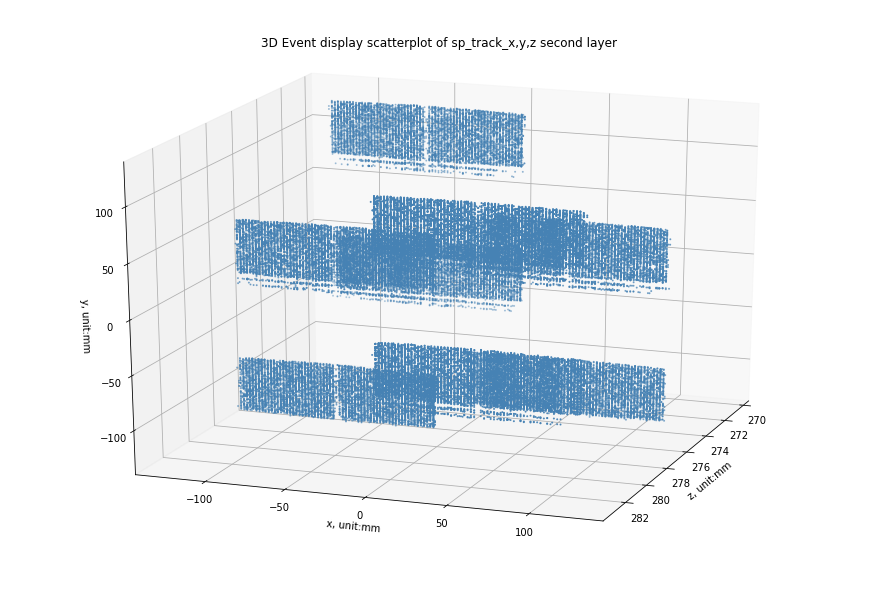

In [249]:
# 3D Event display scatterplot of x,y,z:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
#x, y, z = flat_dataarr[:,2],flat_dataarr[:,3],flat_dataarr[:,4]
x, y, z =track_sp2[:,0],track_sp2[:,1],track_sp2[:,2]
ax.scatter(z,x,y,s=1,color='steelblue')
ax.set_xlabel('z, unit:mm')
ax.set_ylabel('x, unit:mm')
ax.set_zlabel('y, unit:mm')
ax.view_init(elev=20,azim=20)
plt.title('3D Event display scatterplot of sp_track_x,y,z second layer')
#plt.savefig('3D Event display scatterplot of x y z second layer',bbox_inches='tight')
plt.show()

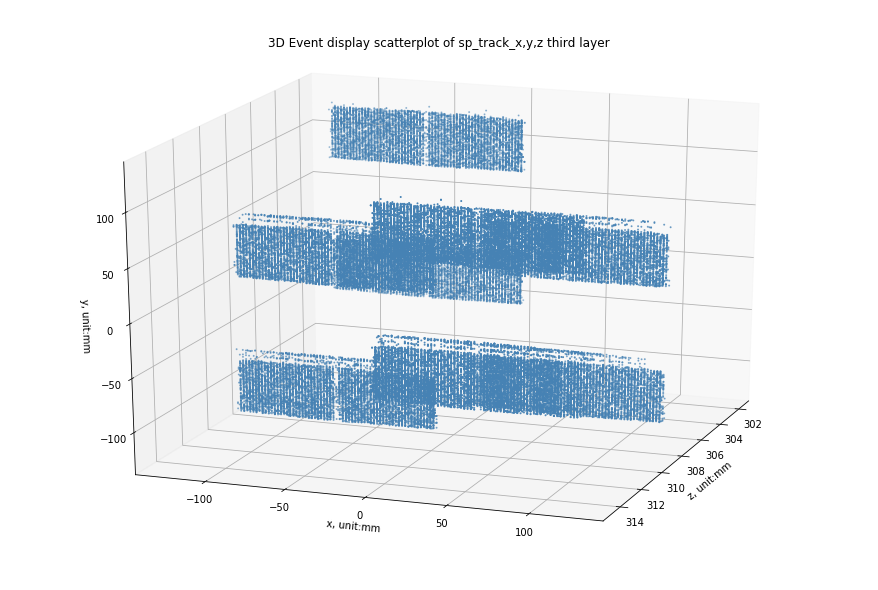

In [247]:
# 3D Event display scatterplot of x,y,z:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
#x, y, z = flat_dataarr[:,2],flat_dataarr[:,3],flat_dataarr[:,4]
x, y, z =track_sp3[:,0],track_sp3[:,1],track_sp3[:,2]
ax.scatter(z,x,y,s=1,color='steelblue')
ax.set_xlabel('z, unit:mm')
ax.set_ylabel('x, unit:mm')
ax.set_zlabel('y, unit:mm')
ax.view_init(elev=20,azim=20)
plt.title('3D Event display scatterplot of sp_track_x,y,z third layer')
#plt.savefig('3D Event display scatterplot of x y z',bbox_inches='tight')
plt.show()

In [98]:
event1=flat_dataarr[0:3]
for i in event1:
    print(i[1])

0.0
0.0
1.0


No handles with labels found to put in legend.


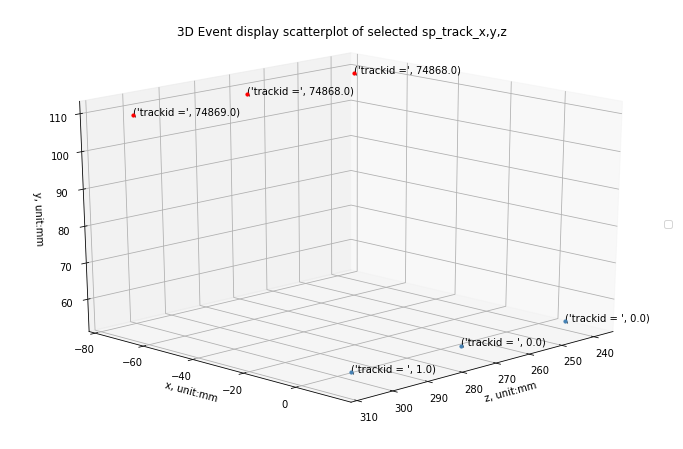

In [156]:
# 3D Event display scatterplot of x,y,z:
fig = figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
event1=flat_dataarr[0:3]
event3=flat_dataarr[-3:]
x1, y1, z1 = flat_dataarr[0:3,2],flat_dataarr[0:3,3],flat_dataarr[0:3,4]
x3, y3, z3 = flat_dataarr[-3:,2],flat_dataarr[-3:,3],flat_dataarr[-3:,4]
#x2, y2, z2 = flat_predicted[:,0],flat_predicted[:,1],flat_predicted[:,2]
for i in range(len(x1)):
    ax.scatter(z1[i],x1[i],y1[i],s=10,color='steelblue')#label='sp_track: first event'
    label1= 'trackid = ',event1[i][1]
    ax.text(z1[i],x1[i],y1[i], label1,size=10,zorder=1,color='k')

for i in range(len(x3)):
    
    ax.scatter(z3[i],x3[i],y3[i],s=10,color='red')#label='sp_track: last event'
    label3= 'trackid =', event3[i][1]
    ax.text(z3[i],x3[i],y3[i], label3,size=10,zorder=1,color='k')   
#ax.scatter(z2,x2,y2,s=0.5,alpha=0.3,color='red',label='sp_track_predicted')
 
ax.set_xlabel('z, unit:mm')
ax.set_ylabel('x, unit:mm')
ax.set_zlabel('y, unit:mm')


plt.legend(loc='center right')
ax.view_init(elev=20,azim=45)
plt.title('3D Event display scatterplot of selected sp_track_x,y,z')
plt.savefig('3D Event display scatterplot of x y z',bbox_inches='tight')
plt.show()

In [207]:
flat_dataarr[6][4]

246.7949981689453

In [347]:
#get the first spacepoints of each track:
track_sp1=np.zeros(shape=(int(len(flat_dataarr)/3),5))
j=0
for i in range(len(flat_dataarr)):
    if (i%3)==0:
        track_sp1[j][0]=flat_dataarr[i][2] # sp_x
        track_sp1[j][1]=flat_dataarr[i][3] # sp_y
        track_sp1[j][2]=flat_dataarr[i][4] # sp_z
        track_sp1[j][3]=flat_dataarr[i][6] # Tx
        track_sp1[j][4]=flat_dataarr[i][8] # Ty
        j+=1

In [240]:
#get the 2nd spacepoints of each track:
track_sp2=np.zeros(shape=(int(len(flat_dataarr)/3),3))
j=0
for i in range(len(flat_dataarr)):
    if (i%3)==1:
        track_sp2[j][0]=flat_dataarr[i][2] # sp_x
        track_sp2[j][1]=flat_dataarr[i][3] # sp_y
        track_sp2[j][2]=flat_dataarr[i][4] # sp_z
        j+=1

In [241]:
#get the 3rd spacepoints of each track:
track_sp3=np.zeros(shape=(int(len(flat_dataarr)/3),3))
j=0
for i in range(len(flat_dataarr)):
    if (i%3)==2:
        track_sp3[j][0]=flat_dataarr[i][2] # sp_x
        track_sp3[j][1]=flat_dataarr[i][3] # sp_y
        track_sp3[j][2]=flat_dataarr[i][4] # sp_z
        track_sp1[j][3]=flat_dataarr[i][6] # Tx
        track_sp1[j][4]=flat_dataarr[i][8] # Ty
        j+=1

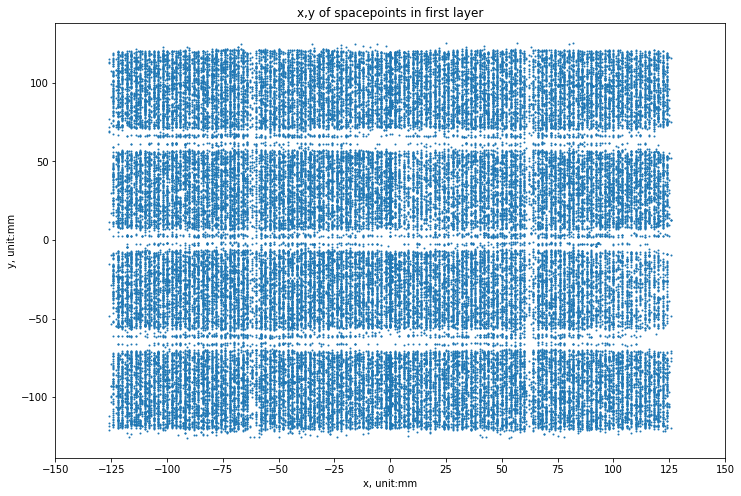

In [336]:
# Scatterplot of x,y:

fig,ax=plt.subplots(1,1,figsize=(12,8))
ax.scatter(track_sp1[:,0],track_sp1[:,1],s=1)
ax.set_title('x,y of spacepoints in first layer')
ax.set_xlabel('x, unit:mm')
ax.set_ylabel('y, unit:mm')

# Get current xtick locations and append personal ticks to this array
x_ticks = np.append(ax.get_xticks(), [-125,-75,-25,25,75,125])
# Set xtick locations to the values of the array `x_ticks`
ax.set_xticks(x_ticks)

# Same for y
y_ticks = np.append(ax.get_yticks(), [-125,-75,-25,25,75,125])
# Set xtick locations to the values of the array `x_ticks`
#ax.set_yticks(y_ticks)
#ax.invert_xaxis()
plt.savefig('First sp of each track x y')
plt.show()

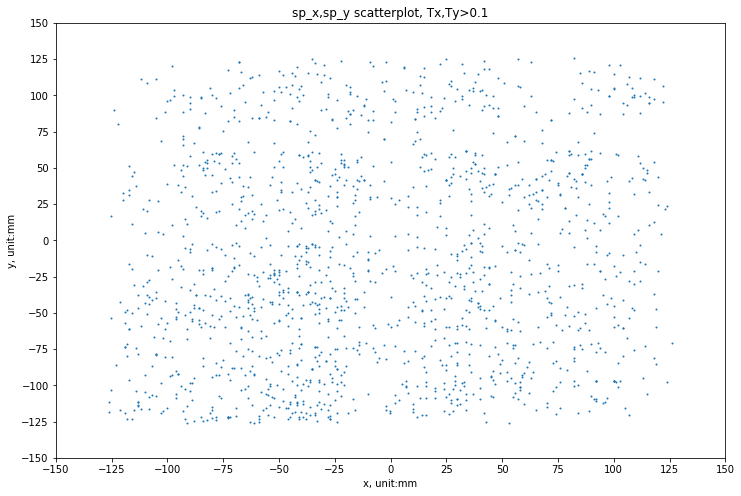

In [356]:
# Scatterplot of x,y with Tx,Ty<0.05:

fig,ax=plt.subplots(1,1,figsize=(12,8))
large_tx=track_sp1[abs(track_sp1[:,3])>0.1]
large_txty=small_tx[abs(large_tx[:,4])>0.1]
ax.scatter(large_txty[:,0],large_txty[:,1],s=1)
ax.set_title('sp_x,sp_y scatterplot, Tx,Ty>0.1')
ax.set_xlabel('x, unit:mm')
ax.set_ylabel('y, unit:mm')

# Get current xtick locations and append personal ticks to this array
x_ticks = np.append(ax.get_xticks(), [-125,-75,-25,25,75,125])
# Set xtick locations to the values of the array `x_ticks`
ax.set_xticks(x_ticks)

# Same for y
y_ticks = np.append(ax.get_yticks(), [-125,-75,-25,25,75,125])
# Set xtick locations to the values of the array `x_ticks`
ax.set_yticks(y_ticks)

plt.savefig('Scatterplot of x and y large tx ty')
plt.show()

In [357]:
print(len(track_sp1),len(large_txty),len(large_txty)/len(track_sp1))

74869 1561 0.020849750898235583


unique z coordinates of first sp : [238.8500061  243.70500183 246.79499817 251.6499939 ]


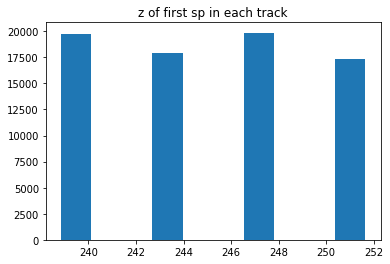

In [221]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
hist_sp=ax.hist(track_sp1[:,2])
plt.title('z of first sp in each track')
print('unique z coordinates of first sp :',np.unique(track_sp1[:,2]))
plt.show()